In [ ]:
#transpose : .T 로 하기~!
#.T.rename(index={0:'column type'}
#.copy
#a=b 는 얕은 복사
#a.copy()는 깊은 복사

In [182]:
execfile('setting.py')

In [183]:
df1=pd.read_csv("/home/piai/다운로드/B2_유통(BtoB)/01_sales_data2.csv")
df2=pd.read_csv("/home/piai/다운로드/B2_유통(BtoB)/02_customer_data.csv")
df3=pd.read_csv("/home/piai/다운로드/B2_유통(BtoB)/03_stock_data.csv")

df=pd.merge(df1,df2,on=['customer_id'],how='left')
df=pd.merge(df,df3,on='product_name',how='left')
df.shape

(282642, 16)

In [3]:
df.head()

,invoice,product_code,product_name,quantity,date,unit_price,customer_id,sales,city,state,pop_thousand,land_sq_meter,pop_size,city_type,city_lctn,stock_type
0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,19.5,Honolulu,HI,339,156,small,sightseeing,other,consignment
1,539993,21499,BLUE POLKADOT WRAP,25,2021-01-04,0.42,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment
2,539993,21498,RED RETROSPOT WRAP,25,2021-01-04,0.42,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment
3,539993,22379,RECYCLING BAG RETROSPOT,5,2021-01-04,2.10,E13313,10.5,Honolulu,HI,339,156,small,sightseeing,other,consignment
4,539993,20718,RED RETROSPOT SHOPPER BAG,10,2021-01-04,1.25,E13313,12.5,Honolulu,HI,339,156,small,sightseeing,other,consignment


In [4]:
#도시(city)에 따른 매출액 크기 비교
#도시의 지리적 위치(city_lctn)에 따른 매출액 크기 비교
#주(state) 별 매출액 크기 비교
#인구규모(pop_thousand-도시 상주 인구수)에따른 매출액 크수
#land_sq_meter고객 매장이 있는 도시의 크기
#pop_size 고객 매장이 있는 도시 크기(big, middle, small city)
#city_type 고객 매장이 있는 도시의 성격(sightseeing, metro, other)
#city_lctn 고객 매장이 있는 도시의 위치

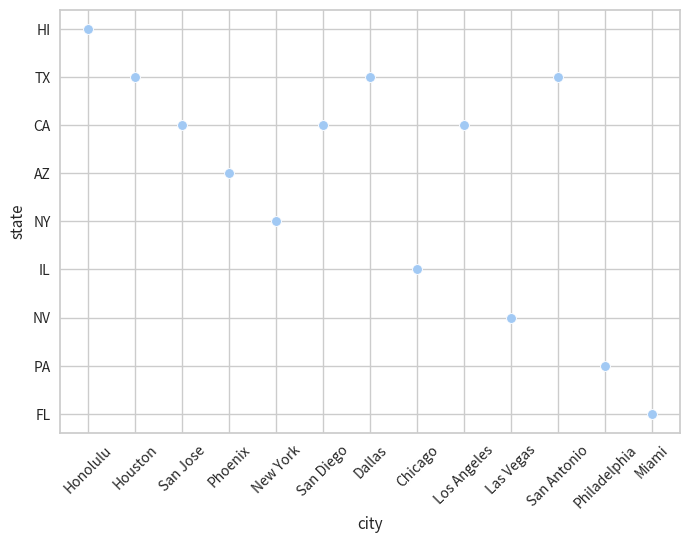

In [16]:
#1. 도시의 특성 파악 도시 열별 상관관계?
sns.scatterplot(x='city',y='state',data=df);
plt.xticks(rotation=45);

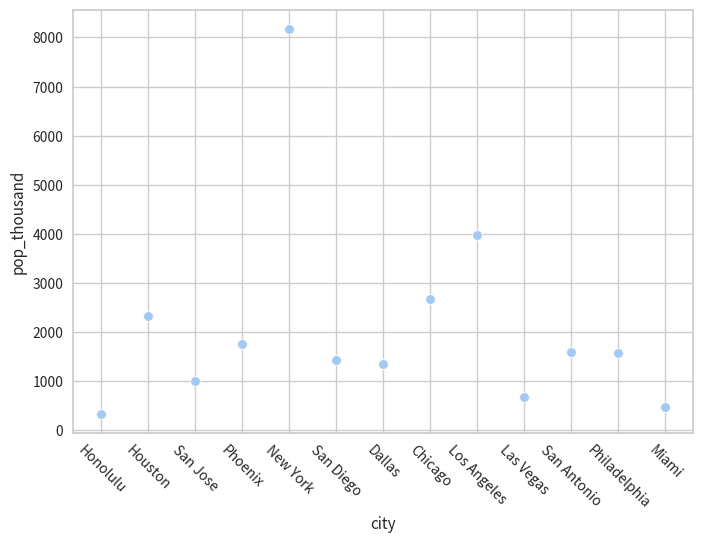

In [14]:
sns.scatterplot(x='city',y='pop_thousand',data=df);
plt.xticks(rotation=-45);

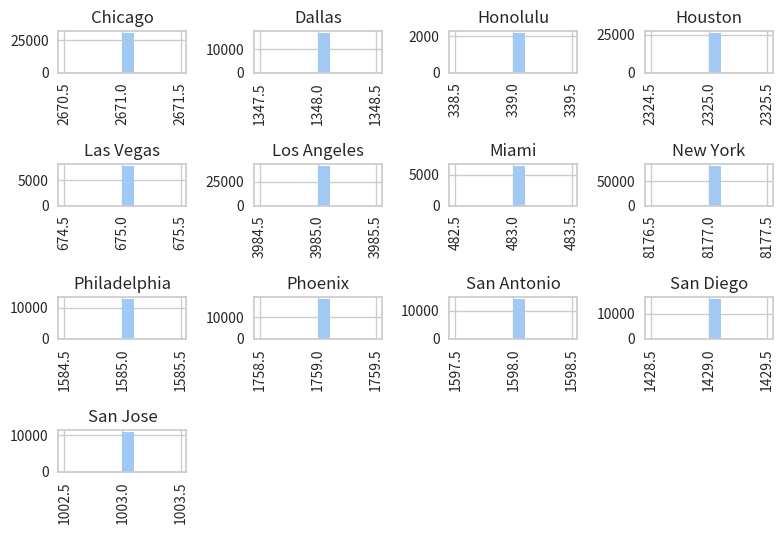

In [28]:
df.hist(column='pop_thousand',by='city')

plt.tight_layout()
plt.show()

In [29]:
df['date']=df['date'].astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282642 entries, 0 to 282641
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   invoice        282642 non-null  object        
 1   product_code   282642 non-null  object        
 2   product_name   282642 non-null  object        
 3   quantity       282642 non-null  int64         
 4   date           282642 non-null  datetime64[ns]
 5   unit_price     282642 non-null  float64       
 6   customer_id    282642 non-null  object        
 7   sales          282642 non-null  float64       
 8   city           282642 non-null  object        
 9   state          282642 non-null  object        
 10  pop_thousand   282642 non-null  int64         
 11  land_sq_meter  282642 non-null  int64         
 12  pop_size       282642 non-null  object        
 13  city_type      282642 non-null  object        
 14  city_lctn      282642 non-null  object        
 15  

In [30]:
# 문자형 변수, 수치형 변수를 각각 탐색한다

In [32]:
category_feature=[col for col in df.columns if df[col].dtypes=='object']
category_feature

['invoice',
 'product_code',
 'product_name',
 'customer_id',
 'city',
 'state',
 'pop_size',
 'city_type',
 'city_lctn',
 'stock_type']

In [34]:
df['city'].value_counts()

New York        80118
Los Angeles     41107
Chicago         30562
Houston         25894
Phoenix         18405
Dallas          16679
San Diego       15876
San Antonio     14193
Philadelphia    12803
San Jose        10766
Las Vegas        7695
Miami            6369
Honolulu         2175
Name: city, dtype: int64

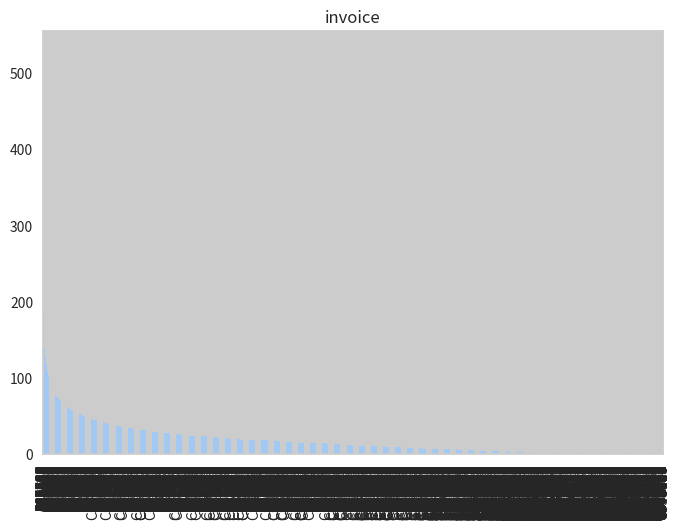

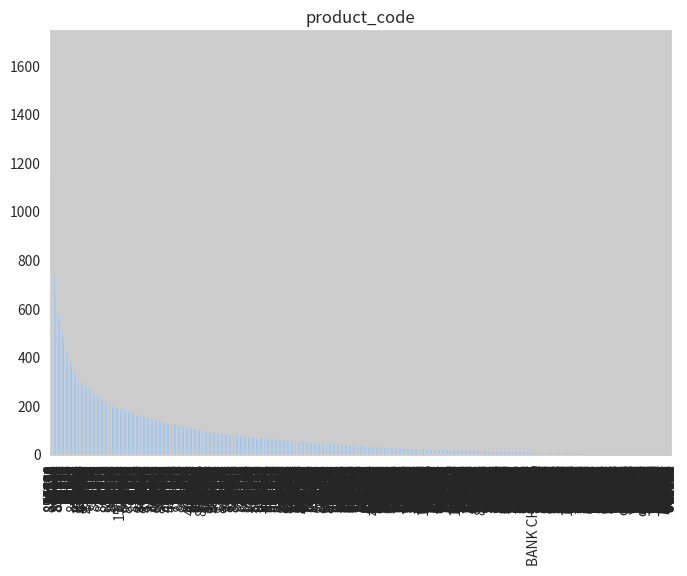

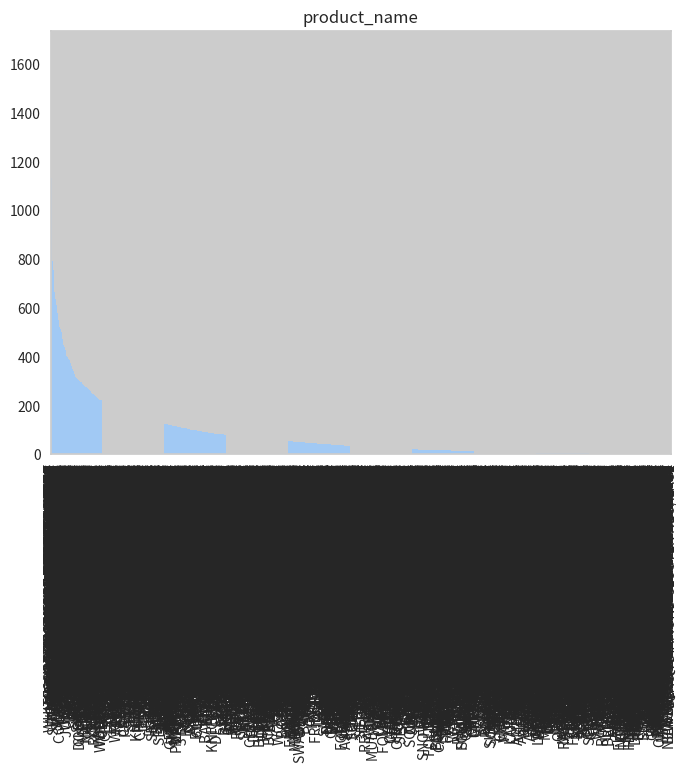

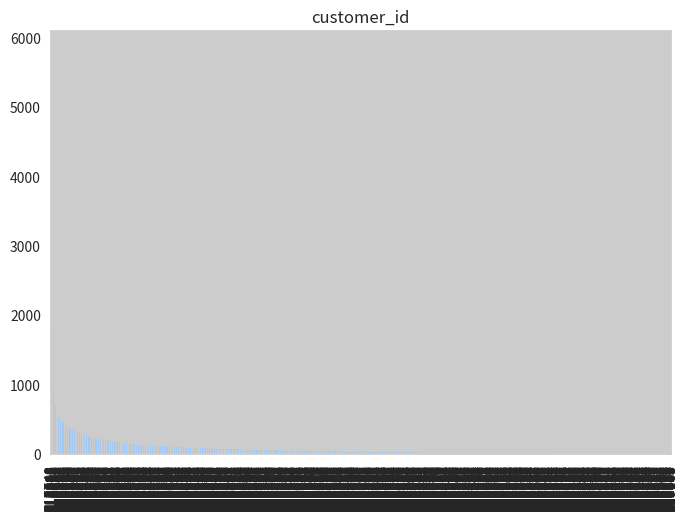

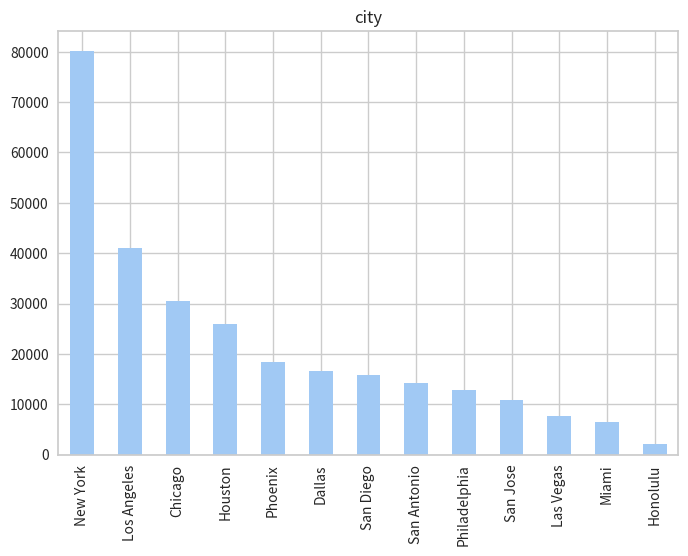

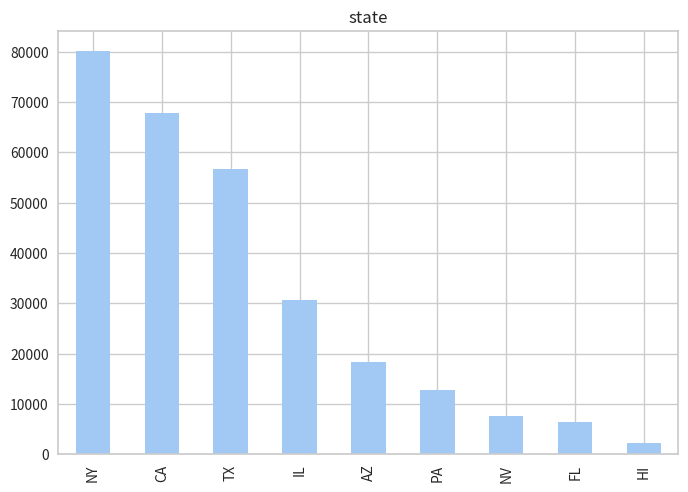

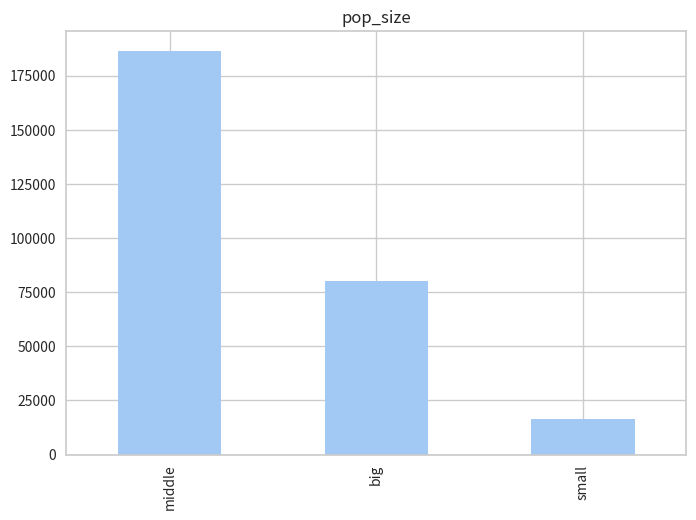

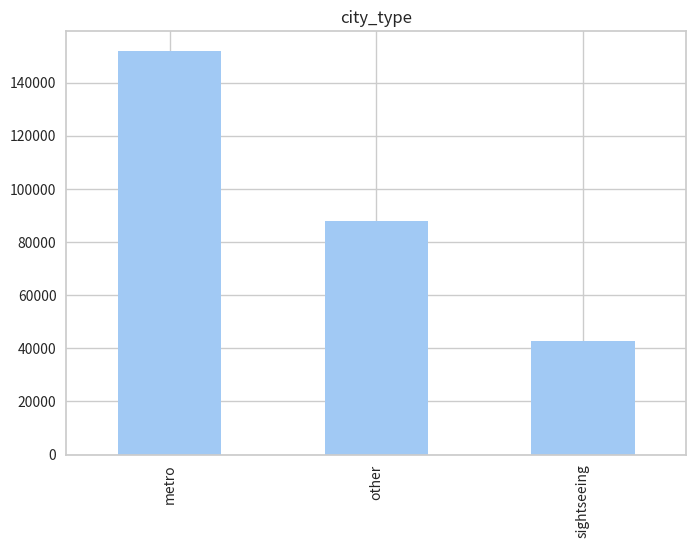

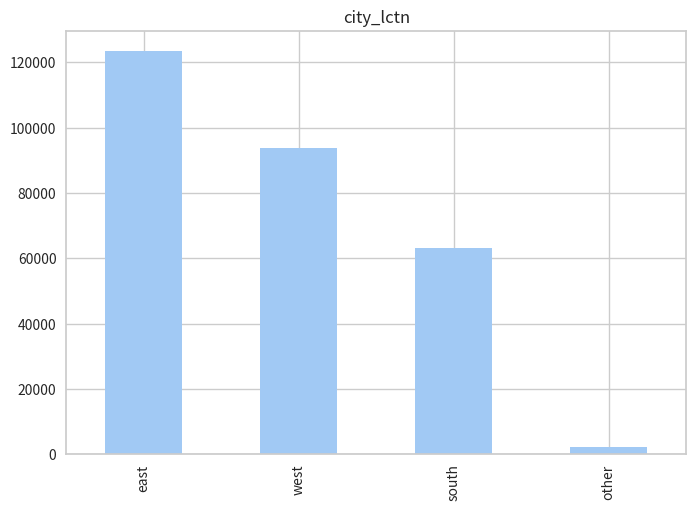

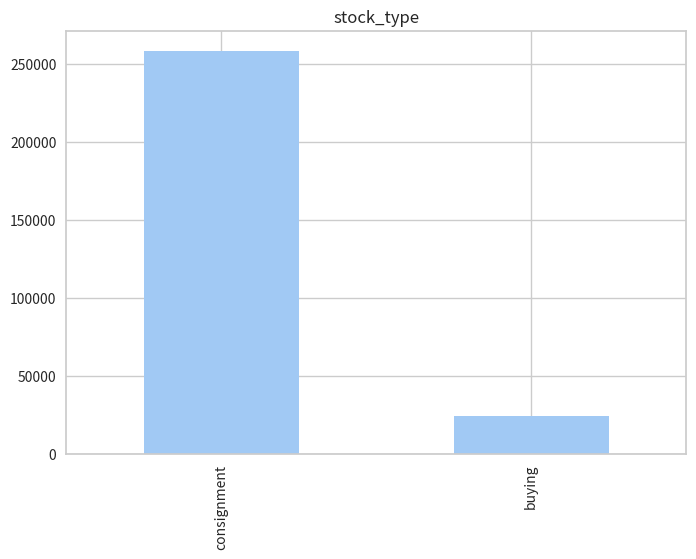

In [36]:
for col in category_feature:
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()

In [ ]:
# 수치형 변수의 분포 살펴보기

In [40]:
numerical_feature=[col for col in df.columns if (df[col].dtypes!='object') & (df[col].dtypes!='datetime64[ns]')]
numerical_feature

['quantity', 'unit_price', 'sales', 'pop_thousand', 'land_sq_meter']

In [42]:
df['quantity'].notnull()

0         True
1         True
2         True
3         True
4         True
          ... 
282637    True
282638    True
282639    True
282640    True
282641    True
Name: quantity, Length: 282642, dtype: bool

In [61]:
#df['quantity'].notnull()  하면 quantity 가 null 이 아니면 다 true
#df.loc[true, 'quantity']
for col in numerical_feature:
    sns.displot(df.loc[df[col].notnull(),col])
    plt.title(col)
    plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fa35f692040> (for post_execute):


KeyboardInterrupt: 

In [62]:
sns.pairplot(df[list(numerical_feature)],x_vars=numerical_feature,y_vars=numerical_feature)
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fa35f692040> (for post_execute):


KeyboardInterrupt: 

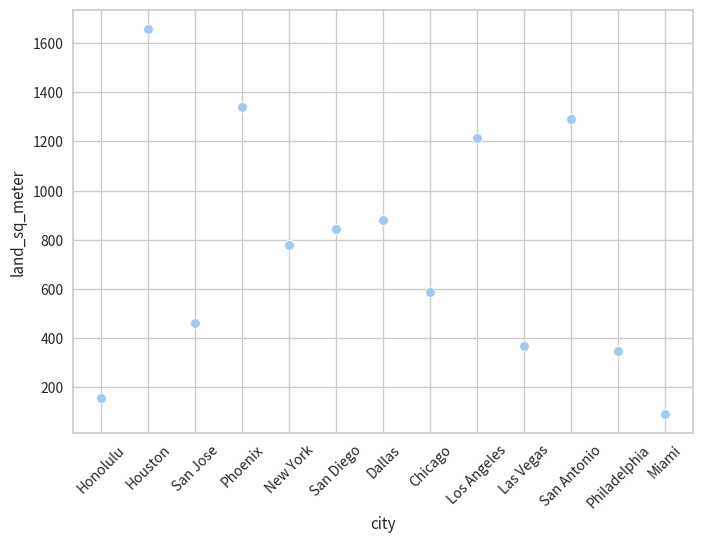

In [63]:
sns.scatterplot(x='city',y='land_sq_meter',data=df);
plt.xticks(rotation=45);
#인구밀도와 인구수는 다름

In [69]:
df_land_sq_meter=df[['city','land_sq_meter']]

In [70]:
df_land_sq_meter

,city,land_sq_meter
0,Honolulu,156
1,Honolulu,156
2,Honolulu,156
3,Honolulu,156
4,Honolulu,156
...,...,...
282637,Houston,1658
282638,Houston,1658
282639,Houston,1658
282640,Houston,1658


In [82]:
df_land_sq_meter.duplicated().value_counts()

True     282629
False        13
dtype: int64

In [83]:
df_land_sq_meter.duplicated().value_counts()
df_land_sq_meter.drop_duplicates(inplace=True)

In [92]:
df_land_sq_meter=df_land_sq_meter.sort_values(by=['land_sq_meter'],axis=0,ascending=False)

In [93]:
df_land_sq_meter

,city,land_sq_meter
17,Houston,1658
30,Phoenix,1341
694,San Antonio,1291
245,Los Angeles,1216
71,Dallas,879
68,San Diego,844
53,New York,778
203,Chicago,589
26,San Jose,461
385,Las Vegas,367


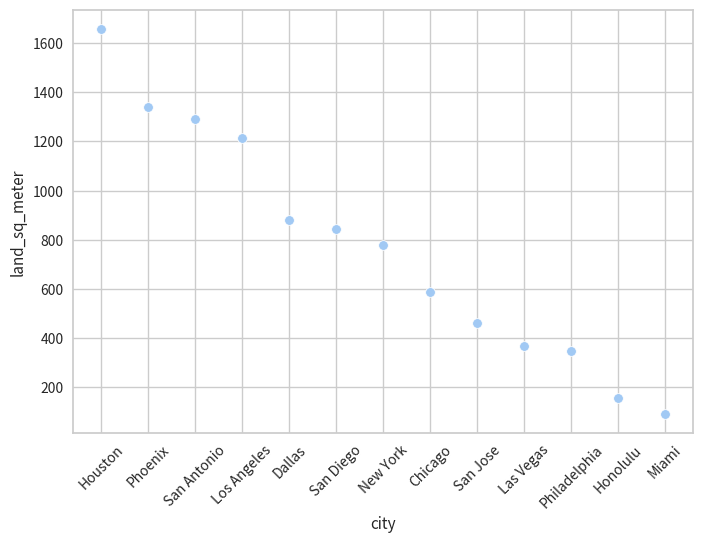

In [101]:
sns.scatterplot(x='city',y='land_sq_meter',data=df_land_sq_meter)
plt.xticks(rotation=45);


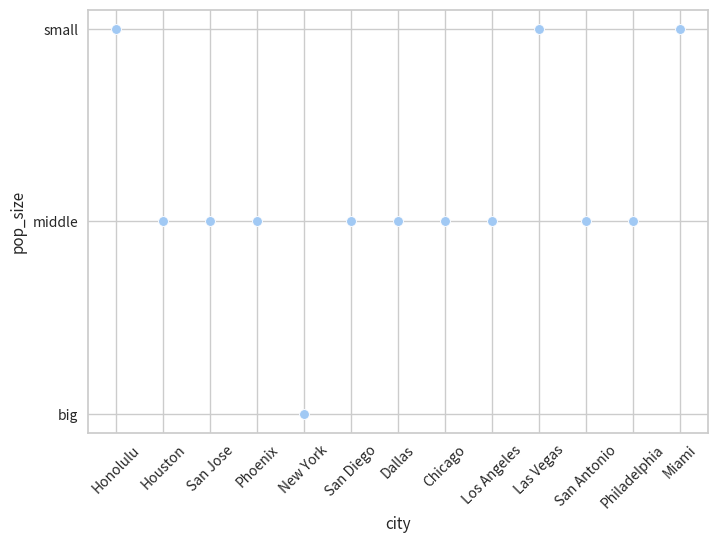

In [106]:
sns.scatterplot(x='city',y='pop_size',data=df)
plt.xticks(rotation=45);
#인구밀도와 인구수는 다름

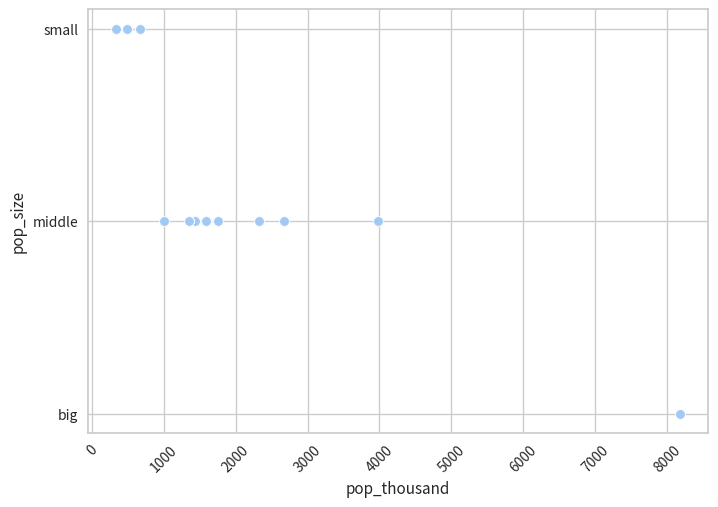

In [107]:
sns.scatterplot(x='pop_thousand',y='pop_size',data=df)
plt.xticks(rotation=45);
#인구밀도와 인구수는 다름

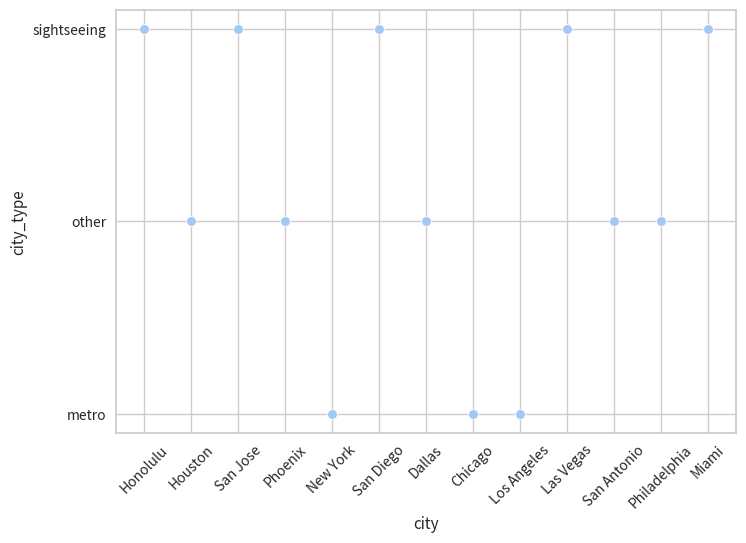

In [108]:
sns.scatterplot(x='city',y='city_type',data=df)
plt.xticks(rotation=45);
#인구밀도와 인구수는 다름

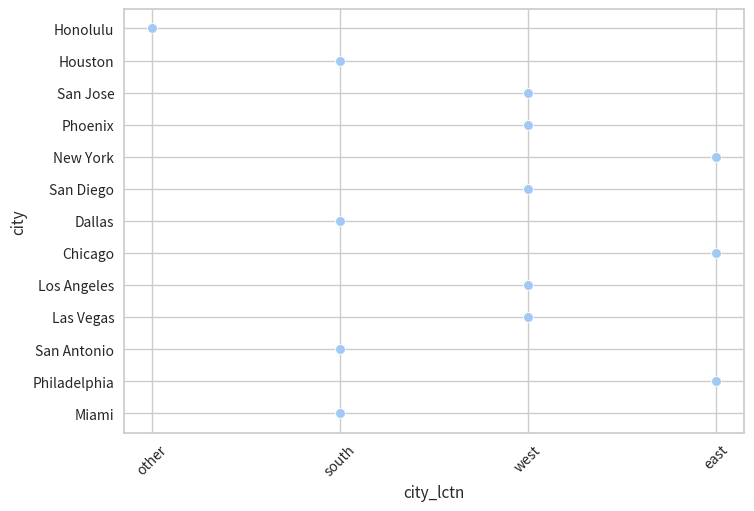

In [110]:
sns.scatterplot(x='city_lctn',y='city',data=df)
plt.xticks(rotation=45);
#인구밀도와 인구수는 다름

In [60]:
df_city=df_raw.groupby('city')['sales'].sum()
df_city

city
Chicago          476962.040
Dallas           246774.560
Honolulu          36932.080
Houston          507553.120
Las Vegas        140541.860
Los Angeles      967161.902
Miami            107094.690
New York        1692874.882
Philadelphia     248010.040
Phoenix          402166.950
San Antonio      270452.170
San Diego        484594.680
San Jose         201233.660
Name: sales, dtype: float64

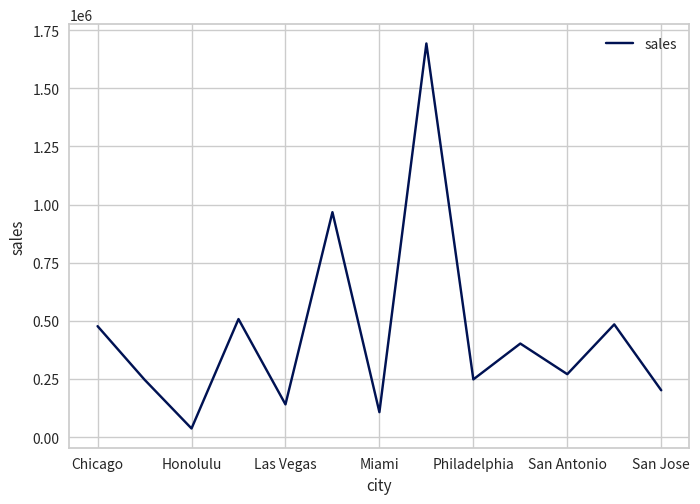

In [91]:
df_city.plot(c='#001253')
plt.ylabel('sales')
plt.show()

In [63]:
df_city=pd.DataFrame(df_city)

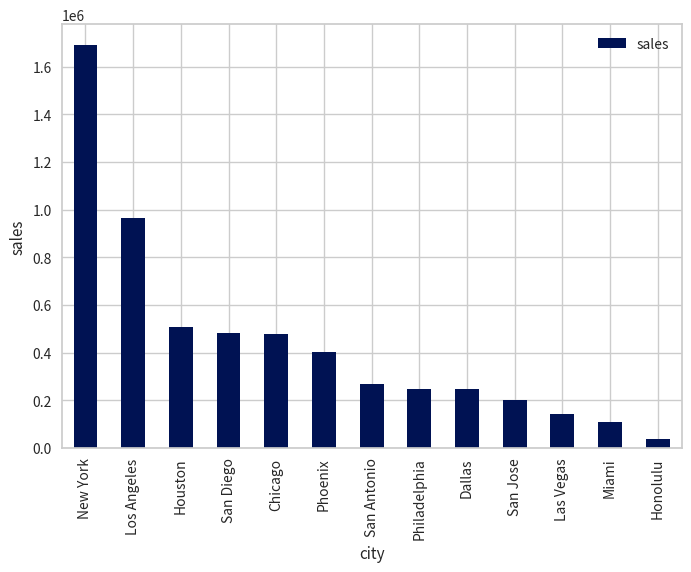

In [90]:
df_city.sort_values(by='sales',ascending=False).plot.bar(color='#001253')
plt.ylabel('sales')
plt.show()

In [74]:
df_lctn=df_raw.groupby('city_lctn')['sales'].sum()
pd.DataFrame(df_lctn)

,sales
city_lctn,
east,2417846.962
other,36932.080
south,1131874.540
west,2195699.052


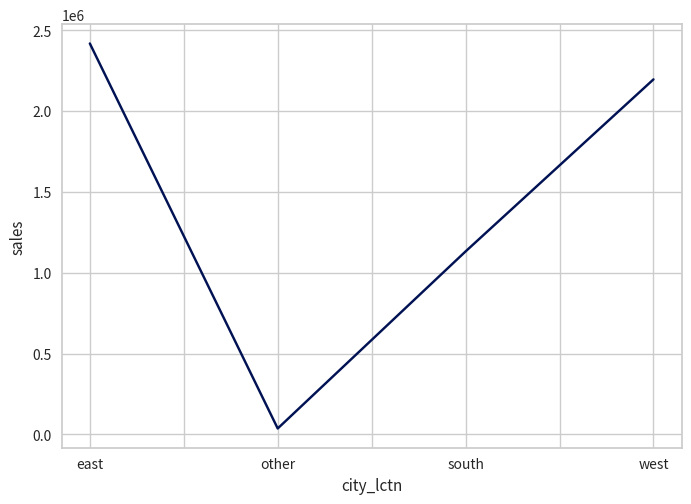

In [89]:
df_lctn.plot(c='#001253')
plt.ylabel('sales')
plt.show()

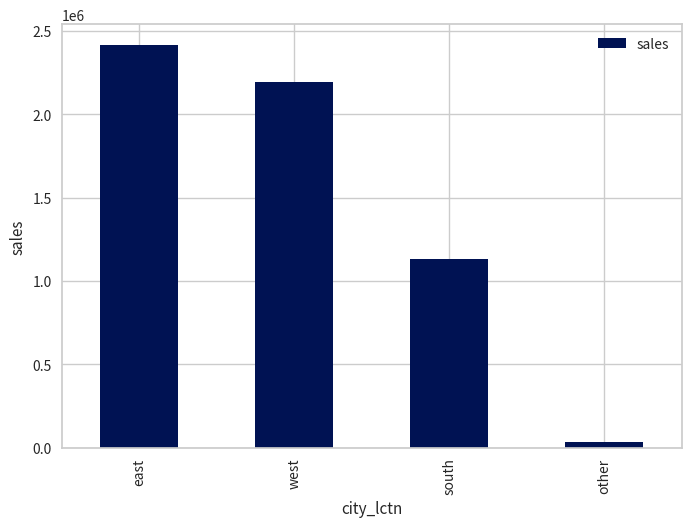

In [88]:
pd.DataFrame(df_lctn).sort_values(by='sales',ascending=False).plot.bar(color='#001253')
plt.ylabel('sales')
plt.show()

In [121]:
df_state=df.groupby('state')['sales'].sum()
df_state

state
AZ     393648.410
CA    1541341.752
FL     105144.470
HI      36436.880
IL     462262.820
NV     137220.880
NY    1633651.132
PA     242928.660
TX     996925.630
Name: sales, dtype: float64

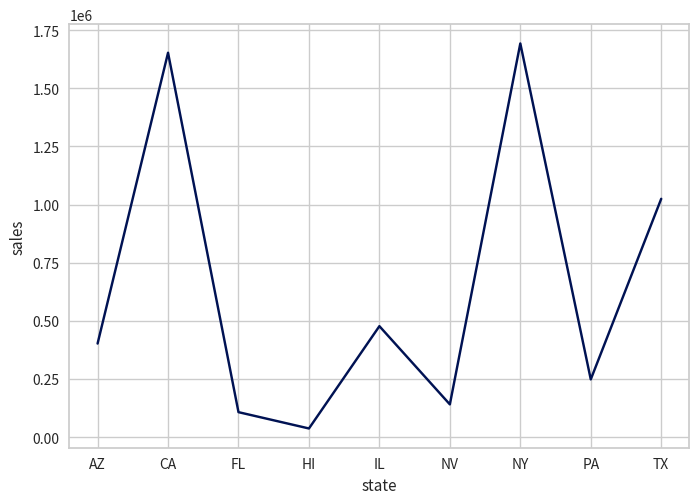

In [87]:
df_state.plot(c='#001253')
plt.ylabel('sales')
plt.show()

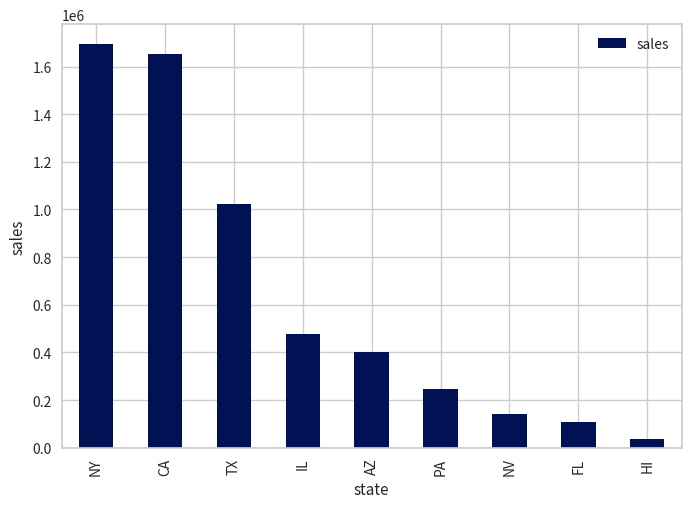

In [86]:
pd.DataFrame(df_state).sort_values(by='sales',ascending=False).plot.bar(color='#001253')
plt.ylabel('sales')
plt.show()

In [80]:
df_popth=df_raw.groupby('pop_thousand')['sales'].sum()
df_popth

pop_thousand
339       36932.080
483      107094.690
675      140541.860
1003     201233.660
1348     246774.560
1429     484594.680
1585     248010.040
1598     270452.170
1759     402166.950
2325     507553.120
2671     476962.040
3985     967161.902
8177    1692874.882
Name: sales, dtype: float64

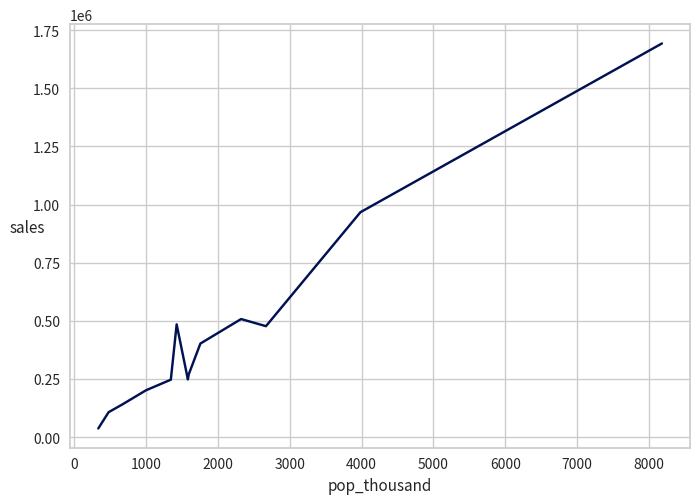

In [101]:
df_popth.plot(color='#001253')
plt.ylabel('sales',rotation=0)
plt.show()

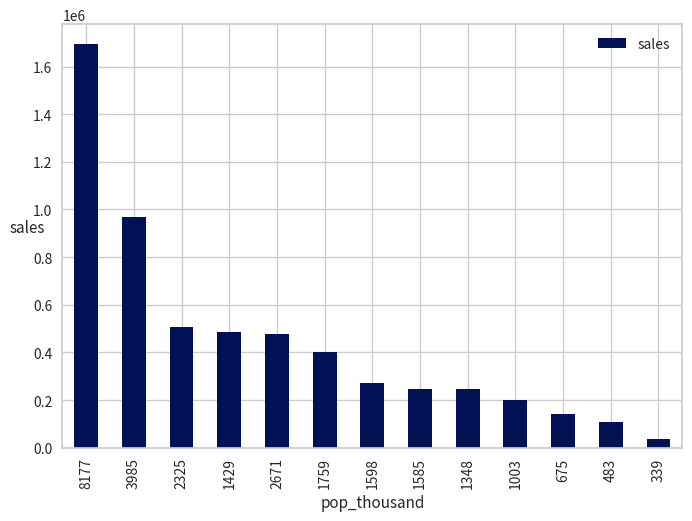

In [103]:
pd.DataFrame(df_popth).sort_values(by='sales',ascending=False).plot.bar(color='#001253')
plt.ylabel('sales',rotation=0)
plt.show()

In [123]:
df_land=df.groupby('land_sq_meter')['sales'].sum()
df_land

land_sq_meter
93       105144.470
156       36436.880
348      242928.660
367      137220.880
461      194580.120
589      462262.820
778     1633651.132
844      469314.600
879      240699.570
1216     877447.032
1291     263406.930
1341     393648.410
1658     492819.130
Name: sales, dtype: float64

Text(0, 0.5, 'sales')

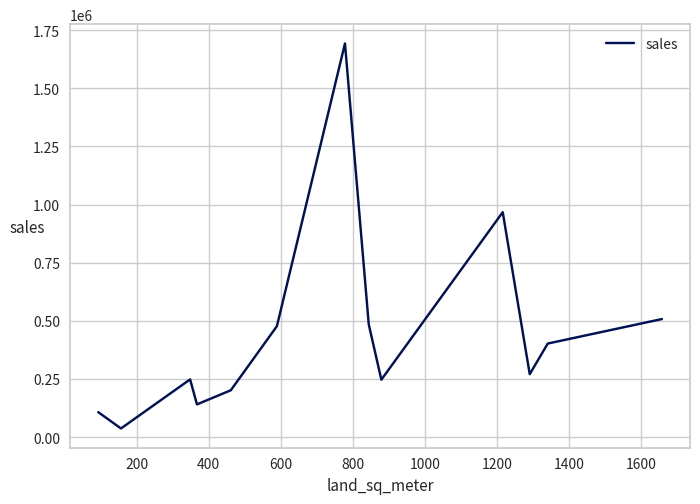

In [106]:
df_land.plot(c='#001253')
plt.ylabel('sales',rotation=0)

Text(0, 0.5, 'sales')

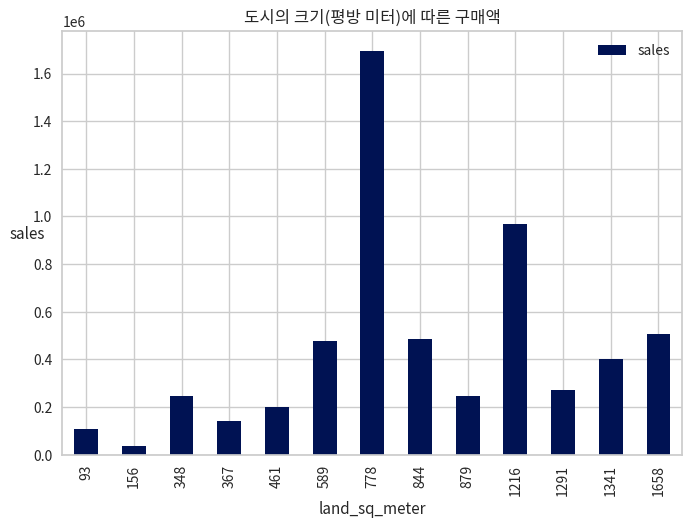

In [111]:
pd.DataFrame(df_land).sort_values(by='land_sq_meter',ascending=True).plot.bar(color='#001253')
plt.title('도시의 크기(평방 미터)에 따른 구매액')
plt.ylabel('sales',rotation=0)

In [130]:
df['land_sq_meter'].value_counts()

778     80118
1216    41107
589     30562
1658    25894
1341    18405
879     16679
844     15876
1291    14193
348     12803
461     10766
367      7695
93       6369
156      2175
Name: land_sq_meter, dtype: int64

In [133]:
df_popsize=df.groupby('pop_size')['sales'].sum()
df_popsize

pop_size
big       1633651.132
middle    3637107.272
small      278802.230
Name: sales, dtype: float64

<AxesSubplot:xlabel='pop_size'>

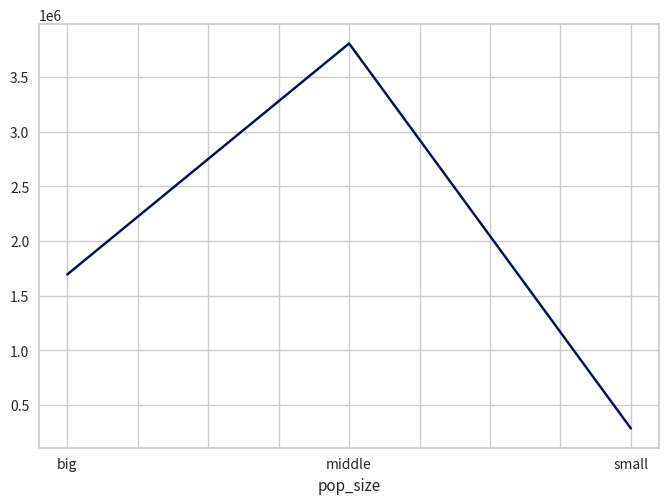

In [112]:
df_popsize.plot(c='#001253')

In [214]:
df_raw=pd.read_csv("/home/piai/Downloads/css.csv")

In [215]:
df_raw.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,invoice,product_code,product_name,quantity,date,unit_price,customer_id,...,pop_size,city_type,city_lctn,stock_type,QuantityCanceled,real_quantity,real_sales,margin,quarter,Refund_OX
0,0,0,0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,...,small,sightseeing,other,consignment,0,10,19.50,1.950,1,0
1,1,1,1,560915,22386,JUMBO BAG PINK POLKADOT,10,2021-07-21,2.08,E13313,...,small,sightseeing,other,consignment,0,10,20.80,2.080,3,0
2,2,2,2,545602,22386,JUMBO BAG PINK POLKADOT,1,2021-03-04,1.95,E17315,...,big,metro,east,consignment,0,1,1.95,0.195,1,0
3,3,3,3,548150,22386,JUMBO BAG PINK POLKADOT,1,2021-03-29,1.95,E17315,...,big,metro,east,consignment,0,1,1.95,0.195,1,0
4,4,4,4,554090,22386,JUMBO BAG PINK POLKADOT,2,2021-05-22,2.08,E17315,...,big,metro,east,consignment,0,2,4.16,0.416,2,0


In [6]:
df_raw.isnull().sum()

Unnamed: 0          0
invoice             0
product_code        0
product_name        0
quantity            0
date                0
unit_price          0
customer_id         0
sales               0
city                0
state               0
pop_thousand        0
land_sq_meter       0
pop_size            0
city_type           0
city_lctn           0
stock_type          0
QuantityCanceled    0
dtype: int64

In [217]:
df_city=df_raw.groupby('city')['real_sales'].sum()
df_city=pd.DataFrame(df_city)
df_city.sort_values(by='real_sales',ascending=False)

,real_sales
city,
New York,1650802.242
Los Angeles,889606.292
Houston,496489.320
San Diego,478855.940
Chicago,469035.990
Phoenix,397576.680
San Antonio,264973.670
Philadelphia,245036.830
Dallas,242459.270


<AxesSubplot:xlabel='city'>

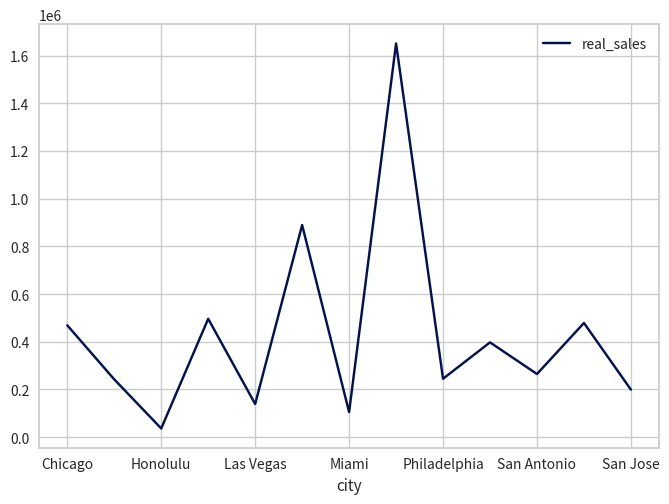

In [218]:
df_city.plot(color='#001253')

<AxesSubplot:xlabel='city'>

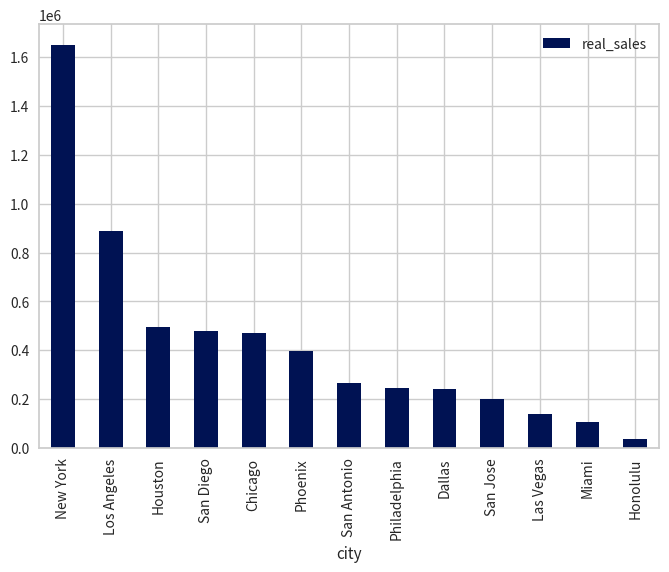

In [219]:
df_city.sort_values(by='real_sales',ascending=False).plot.bar(color='#001253')

In [220]:
df_state=df_raw.groupby('state')['real_sales'].sum()
df_state

state
AZ     397576.680
CA    1567817.802
FL     105332.970
HI      36585.790
IL     469035.990
NV     139248.020
NY    1650802.242
PA     245036.830
TX    1003922.260
Name: real_sales, dtype: float64

<AxesSubplot:xlabel='state'>

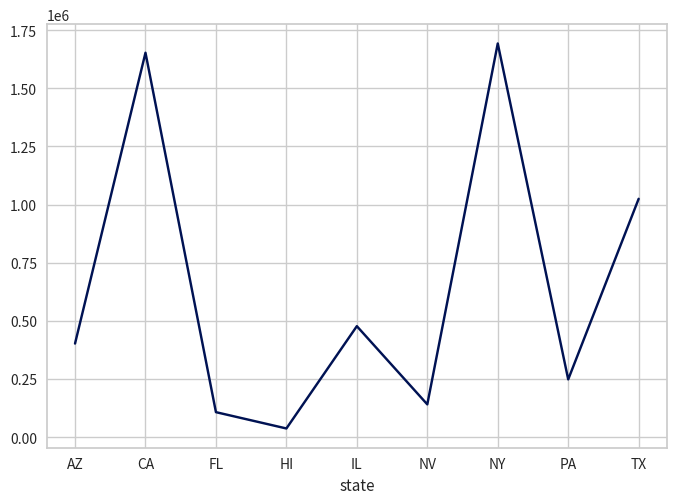

In [116]:
df_state.plot(c='#001253')

<AxesSubplot:xlabel='state'>

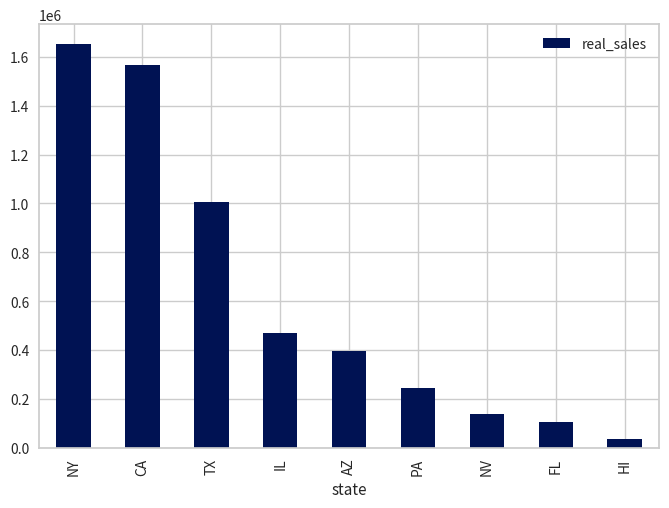

In [221]:
pd.DataFrame(df_state).sort_values(by='real_sales',ascending=False).plot.bar(color='#001253')

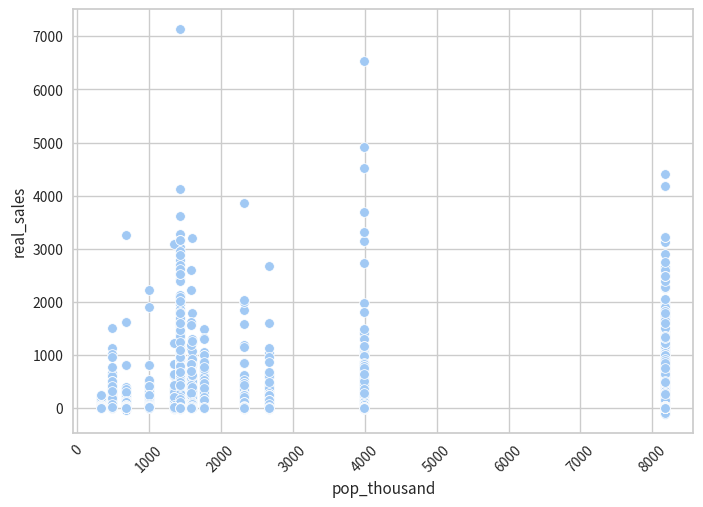

In [222]:
sns.scatterplot(x='pop_thousand',y='real_sales',data=df_raw)
plt.xticks(rotation=45);
#인구밀도와 인구수는 다름

<AxesSubplot:>

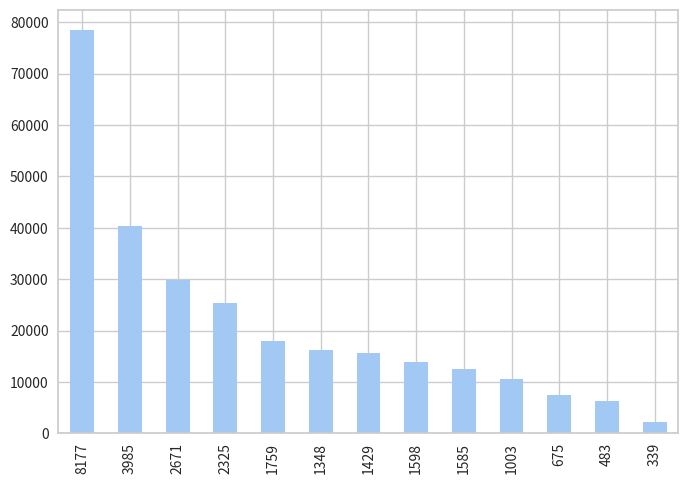

In [18]:
df_popthousand=df_raw[df_raw['pop_thousand'].value_counts()
df_popthousand.plot.bar()

In [19]:
df_raw['pop_thousand'].value_counts()

8177    78522
3985    40274
2671    29934
2325    25368
1759    18037
1348    16293
1429    15534
1598    13934
1585    12482
1003    10546
675      7513
483      6250
339      2137
Name: pop_thousand, dtype: int64

In [21]:
for i in df_raw['pop_thousand'].unique():
    df_count=df_raw[df_raw['pop_thousand']==i]['sales'].value_counts()
    df_count.plot.bar

In [223]:
df_land=df_raw.groupby('land_sq_meter')['real_sales'].sum()
df_land=pd.DataFrame(df_land)

In [224]:
df_land=pd.DataFrame(df_land)

In [225]:
df_land

,real_sales
land_sq_meter,
93,105332.970
156,36585.790
348,245036.830
367,139248.020
461,199355.570
589,469035.990
778,1650802.242
844,478855.940
879,242459.270


In [226]:
df_land.sort_values(by='real_sales',ascending=False)

,real_sales
land_sq_meter,
778,1650802.242
1216,889606.292
1658,496489.320
844,478855.940
589,469035.990
1341,397576.680
1291,264973.670
348,245036.830
879,242459.270


In [227]:
df_popsize=df_raw.groupby('pop_size')['real_sales'].sum()
df_popsize

pop_size
big       1650802.242
middle    3683389.562
small      281166.780
Name: real_sales, dtype: float64

<AxesSubplot:xlabel='pop_size'>

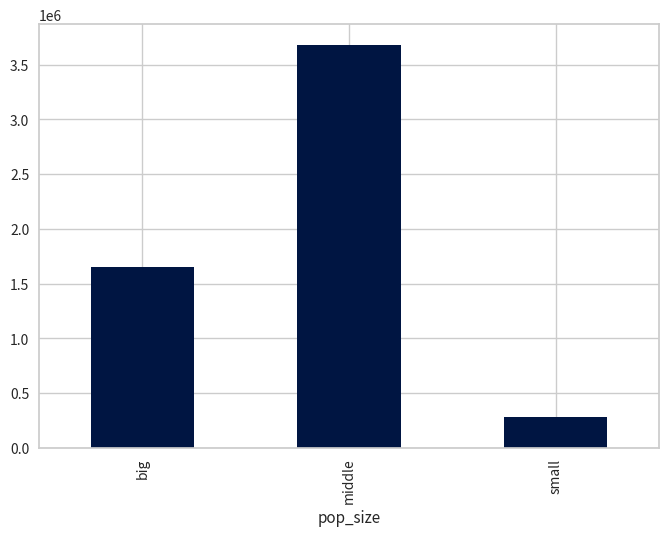

In [230]:
df_popsize.plot.bar(color='#001542')

In [231]:
df_citytype=df_raw.groupby('city_type')['real_sales'].sum()
df_citytype

city_type
metro          3009444.524
other          1646535.770
sightseeing     959378.290
Name: real_sales, dtype: float64

<AxesSubplot:xlabel='city_type'>

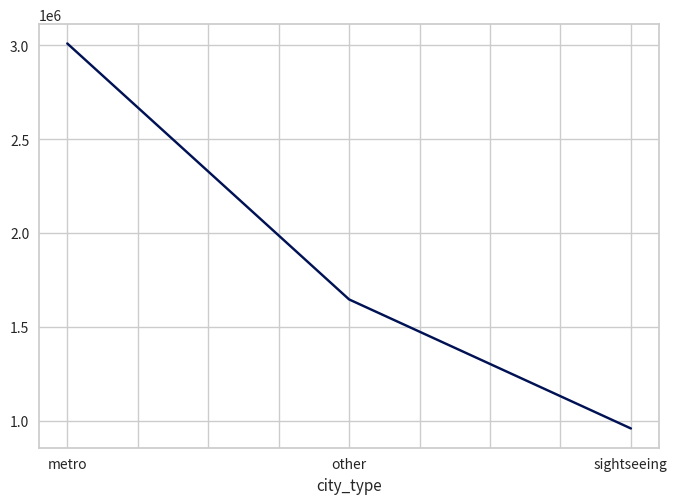

In [232]:
df_citytype.plot(c='#001254')

<AxesSubplot:xlabel='city_type'>

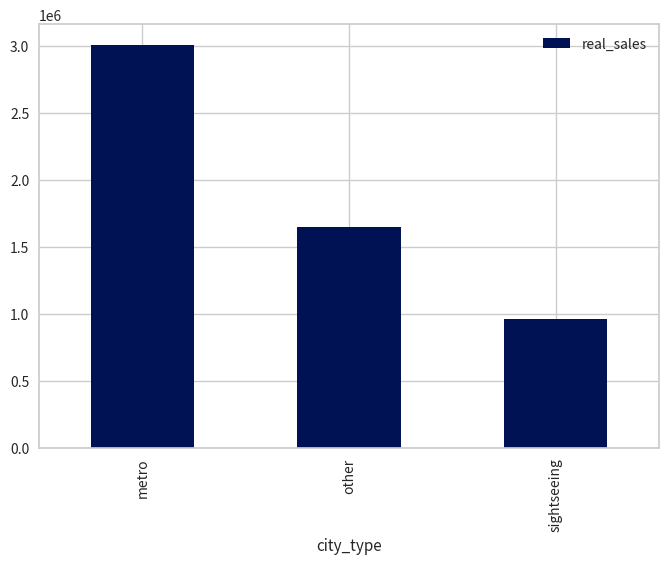

In [233]:
pd.DataFrame(df_citytype).sort_values(by='real_sales',ascending=False).plot.bar(color='#001254')

In [234]:
df_lctn=df_raw.groupby('city_lctn')['real_sales'].sum()
df_lctn

city_lctn
east     2364875.062
other      36585.790
south    1109255.230
west     2104642.502
Name: real_sales, dtype: float64

<AxesSubplot:xlabel='city_lctn'>

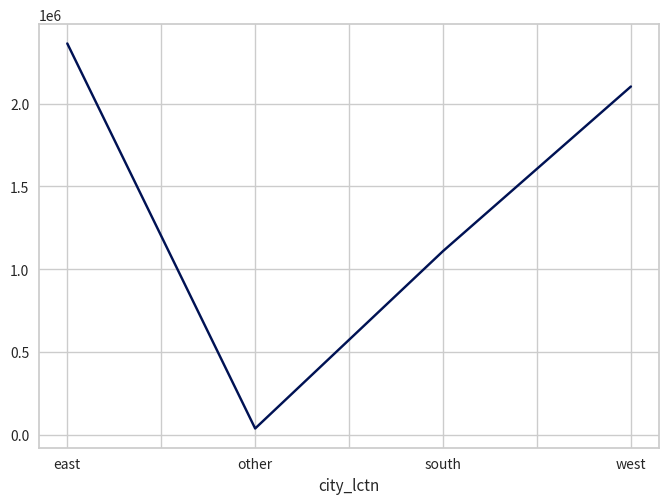

In [235]:
df_lctn.plot(c='#001254')

<AxesSubplot:xlabel='city_lctn'>

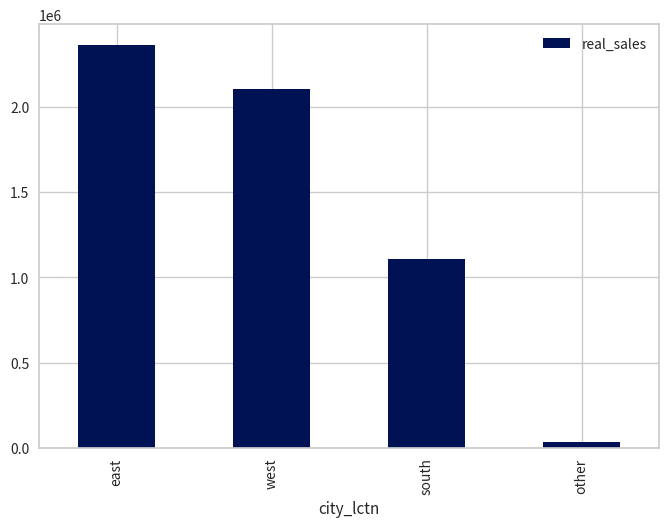

In [236]:
pd.DataFrame(df_lctn).sort_values(by='real_sales',ascending=False).plot.bar(color='#001254')

In [140]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276824 entries, 0 to 276823
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        276824 non-null  int64  
 1   invoice           276824 non-null  object 
 2   product_code      276824 non-null  object 
 3   product_name      276824 non-null  object 
 4   quantity          276824 non-null  int64  
 5   date              276824 non-null  object 
 6   unit_price        276824 non-null  float64
 7   customer_id       276824 non-null  object 
 8   sales             276824 non-null  float64
 9   city              276824 non-null  object 
 10  state             276824 non-null  object 
 11  pop_thousand      276824 non-null  int64  
 12  land_sq_meter     276824 non-null  int64  
 13  pop_size          276824 non-null  object 
 14  city_type         276824 non-null  object 
 15  city_lctn         276824 non-null  object 
 16  stock_type        27

In [178]:
numeric_feature=[col for col in df_raw.columns if df_raw[col].dtypes!='object']
numeric_feature

['Unnamed: 0',
 'quantity',
 'unit_price',
 'sales',
 'pop_thousand',
 'land_sq_meter',
 'QuantityCanceled']

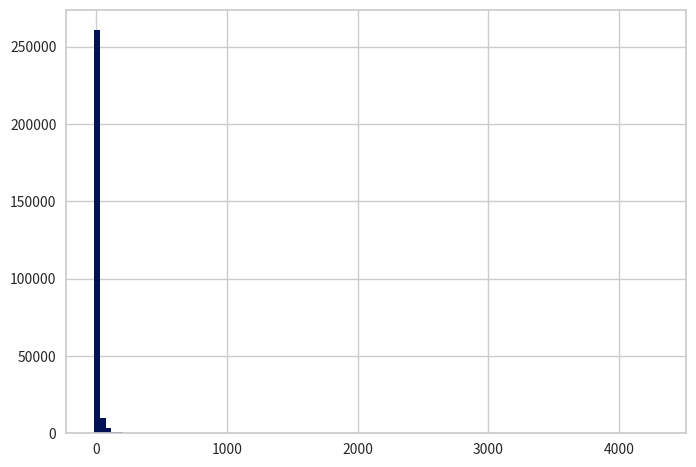

In [237]:
plt.hist(x='real_quantity',data=df_raw,bins=100,color='#001254')
plt.show()

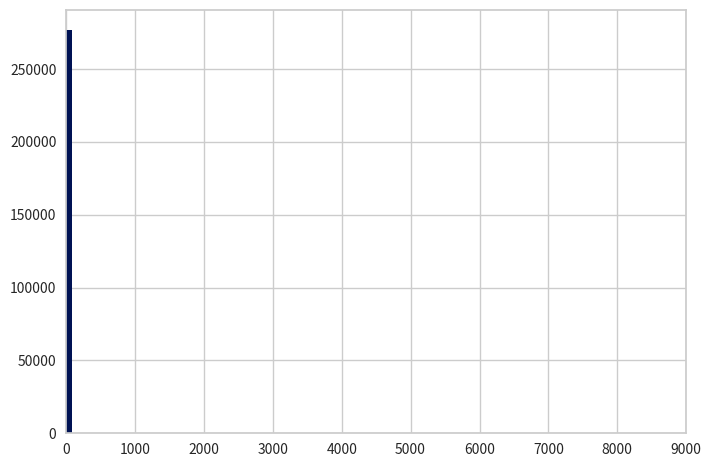

In [164]:
plt.hist(x='unit_price',data=df_raw,bins=100,color='#001254')
plt.xlim(0,9000)
plt.show()

def fun_plot_hist(data, var):        
   > plt.hist(data[data[""] == 1][var], label = "양품", alpha = 0.5)  
    plt.hist(data[data["SCALE"] == 0][var], label = "불량", alpha = 0.5)  
    plt.title(var)  
    plt.legend()  

In [172]:
nonumeric_feature

['Unnamed: 0',
 'quantity',
 'unit_price',
 'sales',
 'pop_thousand',
 'land_sq_meter',
 'QuantityCanceled']

array([[<AxesSubplot:title={'center':'real_quantity'}>,
        <AxesSubplot:title={'center':'unit_price'}>],
       [<AxesSubplot:title={'center':'sales'}>,
        <AxesSubplot:title={'center':'pop_thousand'}>],
       [<AxesSubplot:title={'center':'land_sq_meter'}>,
        <AxesSubplot:title={'center':'QuantityCanceled'}>]], dtype=object)

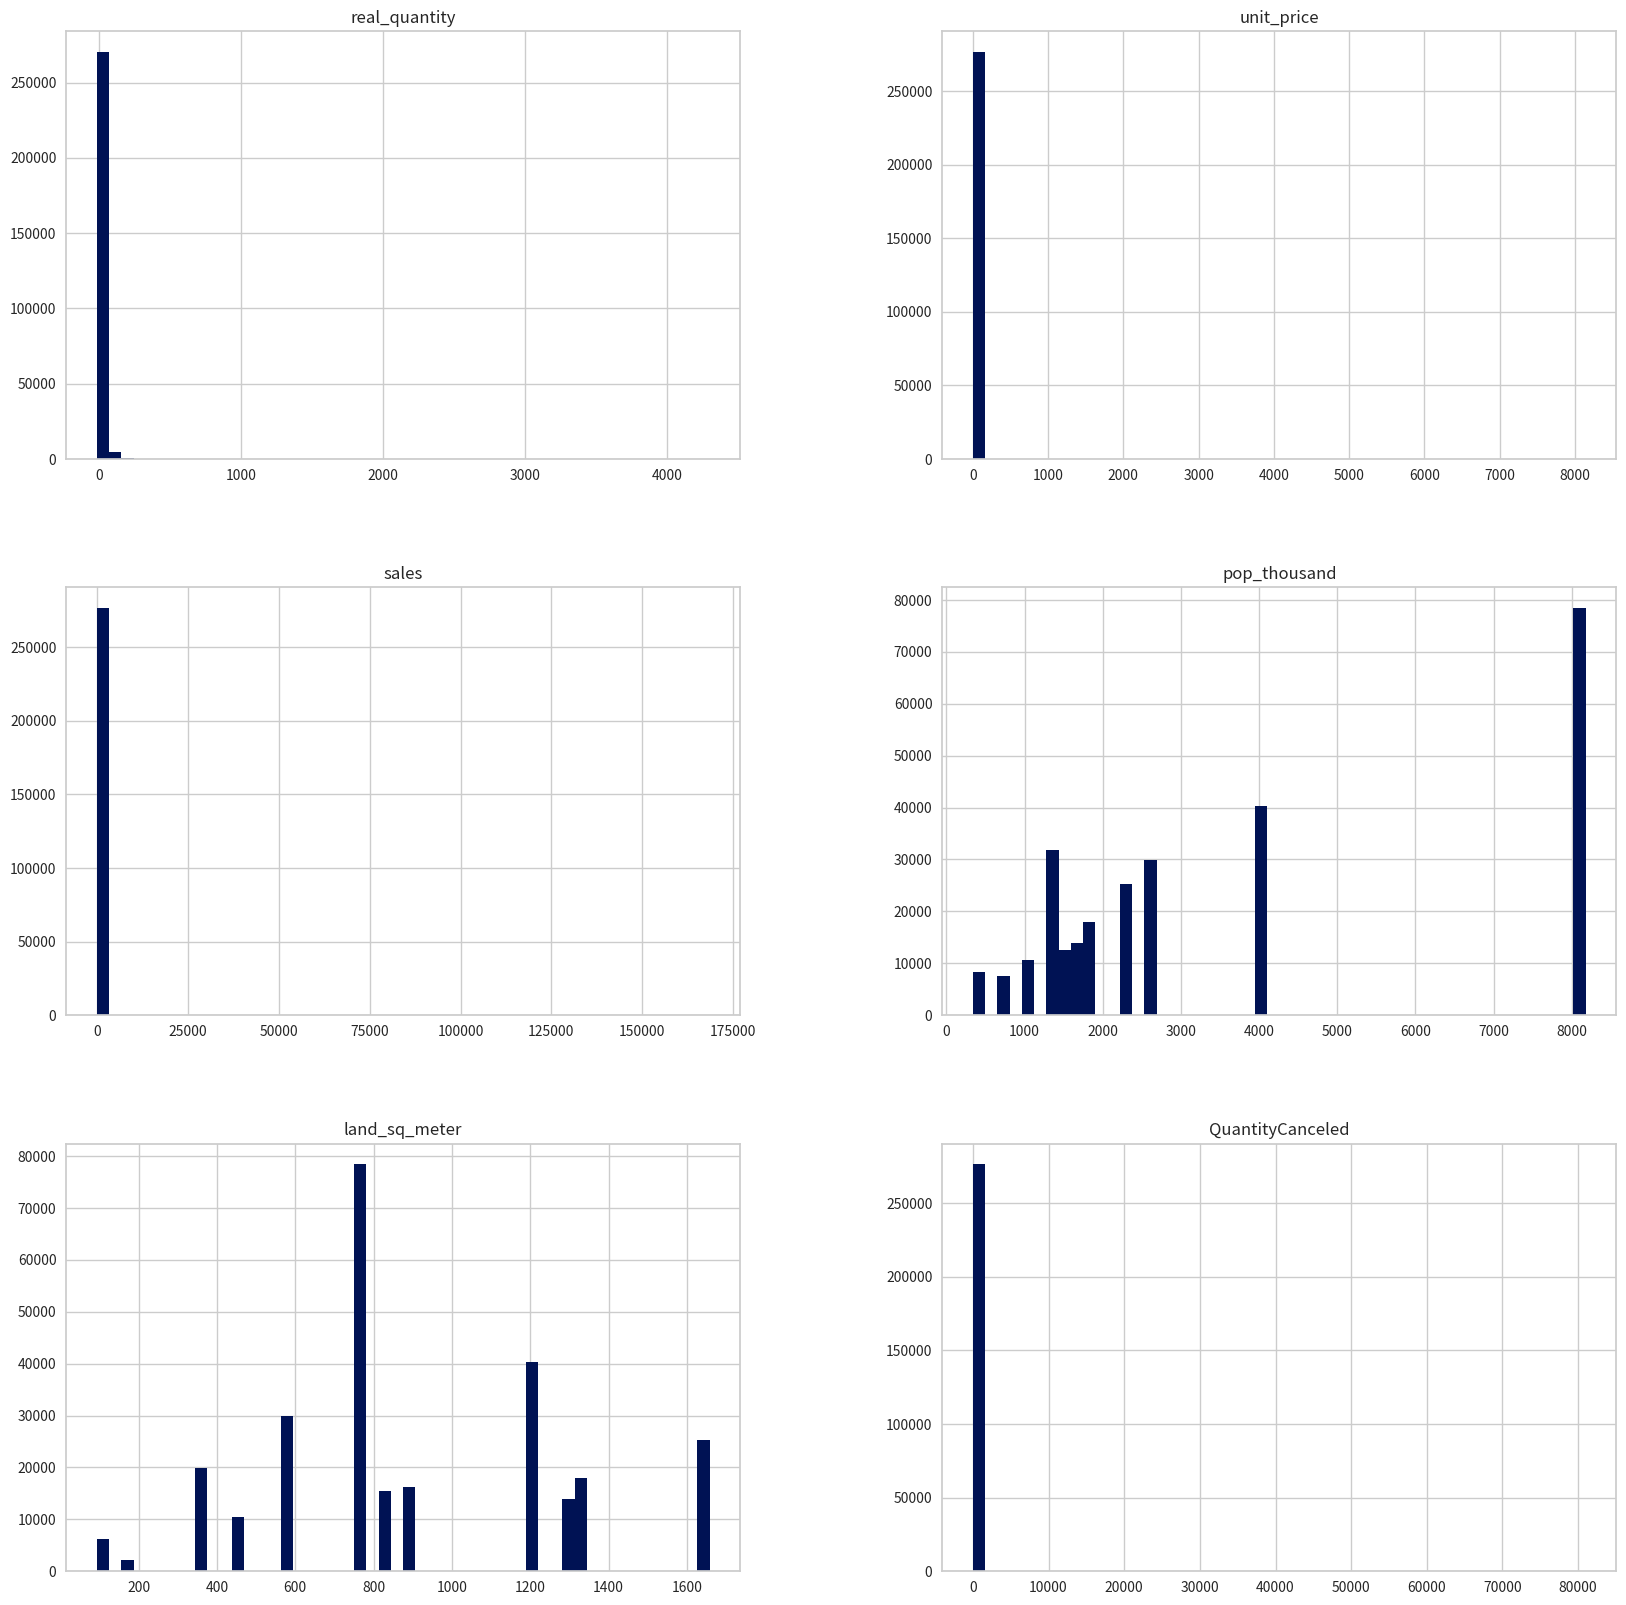

In [241]:
df_raw[['real_quantity','unit_price','sales','pop_thousand','land_sq_meter','QuantityCanceled']].hist(bins=50,figsize=(20,20),color='#001254')

<AxesSubplot:title={'center':'real_quantity'}, xlabel='city_type'>

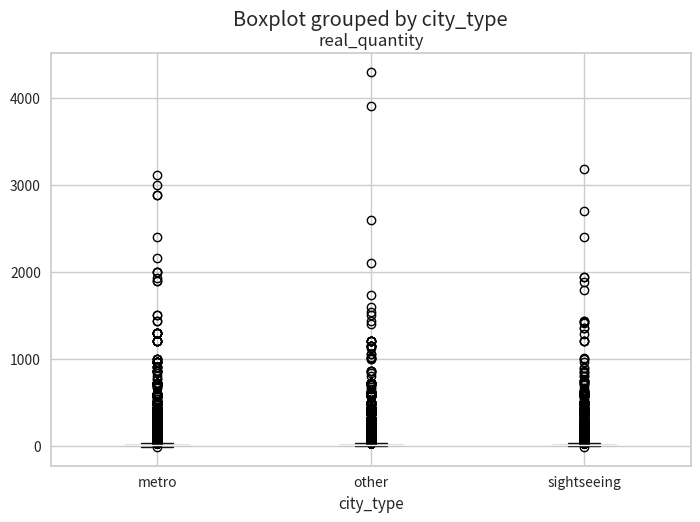

In [242]:
df_raw.boxplot(column='real_quantity',by='city_type')

In [ ]:
df_raw.boxplot(column='real_quantity',by='city_type')

In [179]:
nonumeric_feature=[col for col in df_raw.columns if df_raw[col].dtypes=='object']
nonumeric_feature

['invoice',
 'product_code',
 'product_name',
 'date',
 'customer_id',
 'city',
 'state',
 'pop_size',
 'city_type',
 'city_lctn',
 'stock_type']

In [180]:
numeric_feature

['Unnamed: 0',
 'quantity',
 'unit_price',
 'sales',
 'pop_thousand',
 'land_sq_meter',
 'QuantityCanceled']

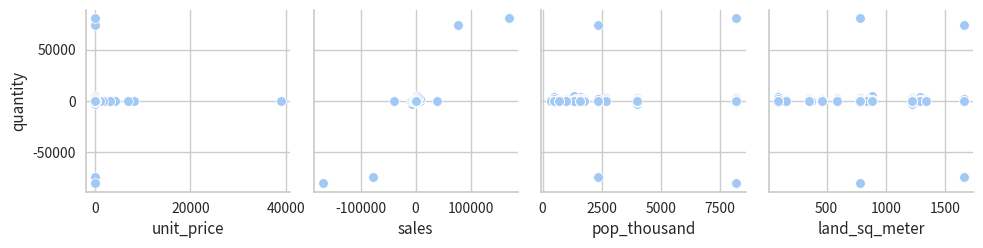

In [201]:
sns.pairplot(df, y_vars='quantity',x_vars=['unit_price','sales','pop_thousand','land_sq_meter'])

<AxesSubplot:xlabel='real_quantity', ylabel='unit_price'>

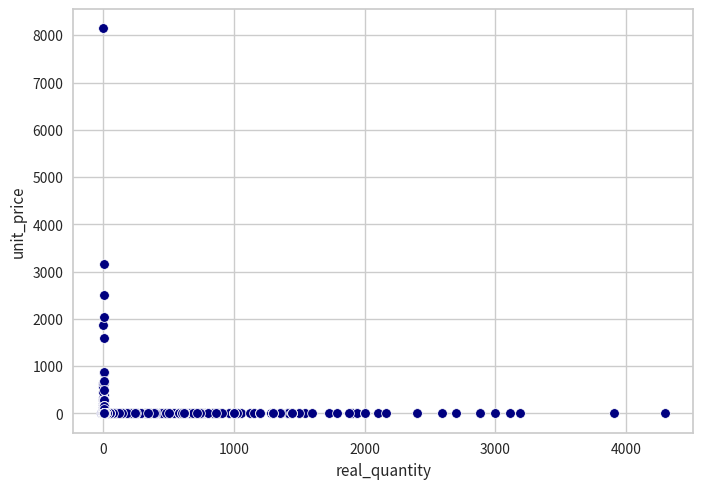

In [244]:
sns.scatterplot(x='real_quantity',y='unit_price',data=df_raw,color='navy')

<AxesSubplot:xlabel='real_quantity', ylabel='real_sales'>

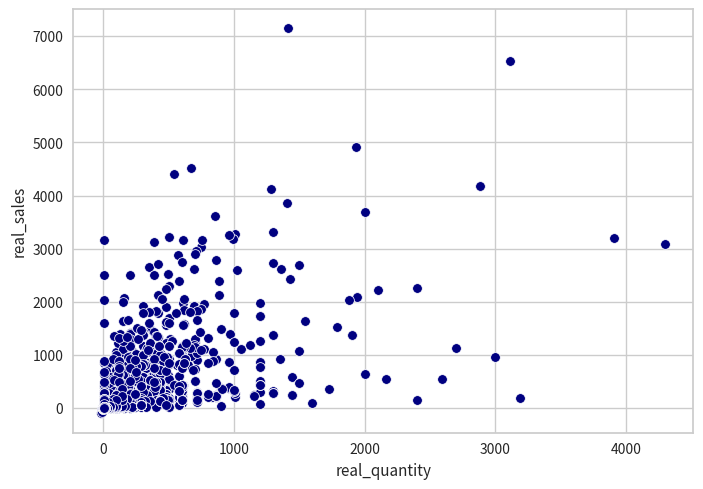

In [246]:
sns.scatterplot(x='real_quantity',y='real_sales',data=df_raw,color='navy')

<AxesSubplot:xlabel='real_quantity', ylabel='pop_thousand'>

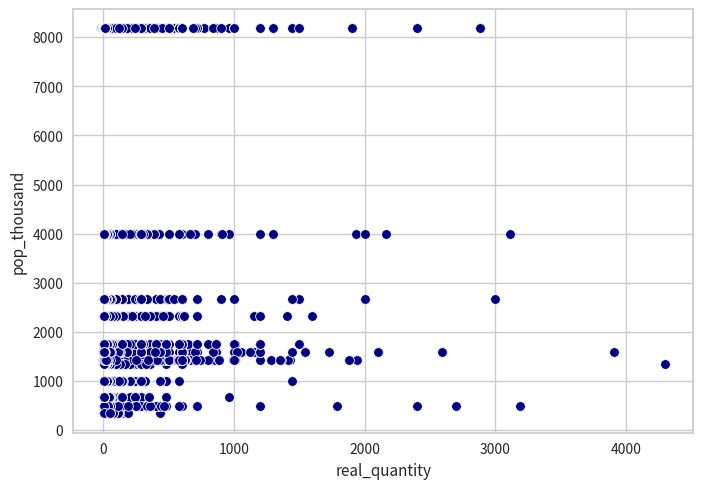

In [248]:
sns.scatterplot(x='real_quantity',y='pop_thousand',data=df_raw,color='navy')

<AxesSubplot:xlabel='real_quantity', ylabel='land_sq_meter'>

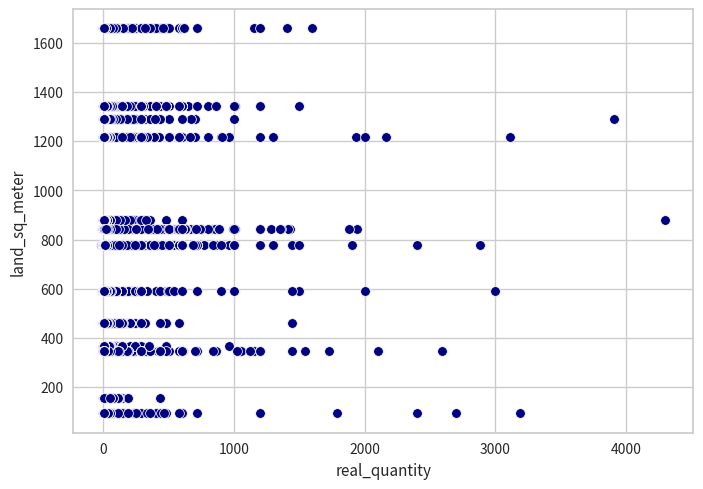

In [250]:
sns.scatterplot(x='real_quantity',y='land_sq_meter',data=df_raw,color='navy')

<AxesSubplot:xlabel='real_quantity', ylabel='real_sales'>

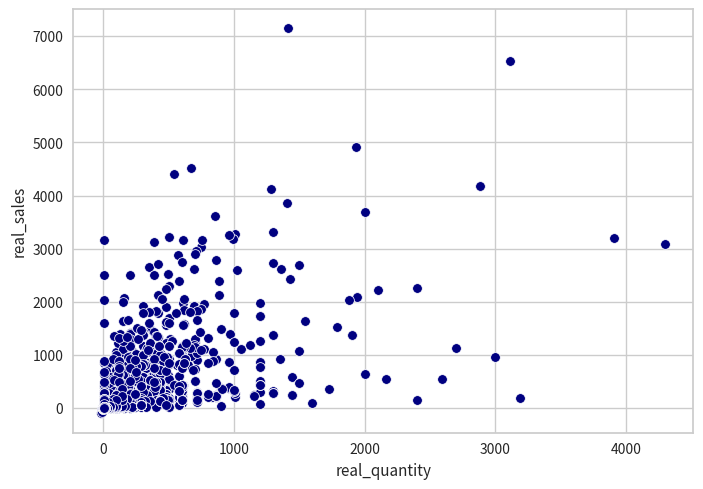

In [290]:
sns.scatterplot(x='real_quantity',y='real_sales',data=df_raw,color='navy')

In [312]:
df_raw[['real_quantity','real_sales']].corr()

,real_quantity,real_sales
real_quantity,1.000000,0.668756
real_sales,0.668756,1.000000


In [252]:
df_raw['date']=df_raw['date'].astype('datetime64[ns]')

In [253]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276787 entries, 0 to 276786
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Unnamed: 0.2      276787 non-null  int64         
 1   Unnamed: 0.1      276787 non-null  int64         
 2   Unnamed: 0        276787 non-null  int64         
 3   invoice           276787 non-null  int64         
 4   product_code      276787 non-null  object        
 5   product_name      276787 non-null  object        
 6   quantity          276787 non-null  int64         
 7   date              276787 non-null  datetime64[ns]
 8   unit_price        276787 non-null  float64       
 9   customer_id       276787 non-null  object        
 10  sales             276787 non-null  float64       
 11  city              276787 non-null  object        
 12  state             276787 non-null  object        
 13  pop_thousand      276787 non-null  int64         
 14  land

In [254]:
df_raw['month']=pd.DatetimeIndex(df_raw['date']).month
df_raw.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,invoice,product_code,product_name,quantity,date,unit_price,customer_id,...,city_type,city_lctn,stock_type,QuantityCanceled,real_quantity,real_sales,margin,quarter,Refund_OX,month
0,0,0,0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,...,sightseeing,other,consignment,0,10,19.50,1.950,1,0,1
1,1,1,1,560915,22386,JUMBO BAG PINK POLKADOT,10,2021-07-21,2.08,E13313,...,sightseeing,other,consignment,0,10,20.80,2.080,3,0,7
2,2,2,2,545602,22386,JUMBO BAG PINK POLKADOT,1,2021-03-04,1.95,E17315,...,metro,east,consignment,0,1,1.95,0.195,1,0,3
3,3,3,3,548150,22386,JUMBO BAG PINK POLKADOT,1,2021-03-29,1.95,E17315,...,metro,east,consignment,0,1,1.95,0.195,1,0,3
4,4,4,4,554090,22386,JUMBO BAG PINK POLKADOT,2,2021-05-22,2.08,E17315,...,metro,east,consignment,0,2,4.16,0.416,2,0,5


In [255]:
def quarter (x):
    if 1<=x<=3:
        return 1
    elif 4<=x<=6:
        return 2
    elif 7<=x<=9:
        return 3
    elif 10<=x<=12:
        return 4


In [256]:
df_raw['quarter']=df_raw['month'].apply(quarter)
df_raw.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,invoice,product_code,product_name,quantity,date,unit_price,customer_id,...,city_type,city_lctn,stock_type,QuantityCanceled,real_quantity,real_sales,margin,quarter,Refund_OX,month
0,0,0,0,539993,22386,JUMBO BAG PINK POLKADOT,10,2021-01-04,1.95,E13313,...,sightseeing,other,consignment,0,10,19.50,1.950,1,0,1
1,1,1,1,560915,22386,JUMBO BAG PINK POLKADOT,10,2021-07-21,2.08,E13313,...,sightseeing,other,consignment,0,10,20.80,2.080,3,0,7
2,2,2,2,545602,22386,JUMBO BAG PINK POLKADOT,1,2021-03-04,1.95,E17315,...,metro,east,consignment,0,1,1.95,0.195,1,0,3
3,3,3,3,548150,22386,JUMBO BAG PINK POLKADOT,1,2021-03-29,1.95,E17315,...,metro,east,consignment,0,1,1.95,0.195,1,0,3
4,4,4,4,554090,22386,JUMBO BAG PINK POLKADOT,2,2021-05-22,2.08,E17315,...,metro,east,consignment,0,2,4.16,0.416,2,0,5


In [262]:
west=pd.DataFrame(df_raw[df_raw['city_lctn']=='west'])
east=pd.DataFrame(df_raw[df_raw['city_lctn']=='east'])
south=pd.DataFrame(df_raw[df_raw['city_lctn']=='south'])
other=pd.DataFrame(df_raw[df_raw['city_lctn']=='other'])

In [263]:
west_sales=west.groupby('quarter')['sales'].sum()
west_sales

quarter
1    478207.990
2    559870.371
3    664733.801
4    493441.410
Name: sales, dtype: float64

In [264]:

east_sales=east.groupby('quarter')['sales'].sum()
south_sales=south.groupby('quarter')['sales'].sum()
other_sales=other.groupby('quarter')['sales'].sum()

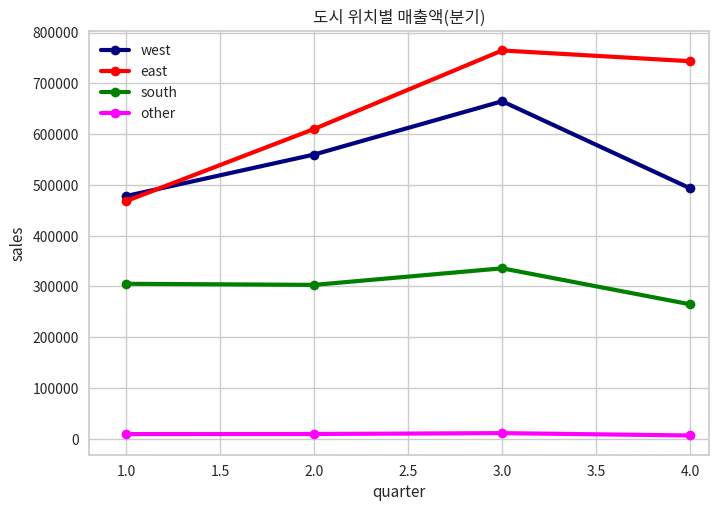

In [303]:
west_sales.plot(label='west',linewidth=3,marker='o',color='navy')
east_sales.plot(label='east',linewidth=3,marker='o',color='red')
south_sales.plot(label='south',linewidth=3,marker='o',color='green')
other_sales.plot(label='other',linewidth=3,marker='o',color='magenta')
plt.ylabel('sales')
plt.title('도시 위치별 매출액(분기)')
plt.xlim(0.8,4.1)
plt.yticks(rotation=0)
plt.legend()
plt.show()

In [278]:
small=pd.DataFrame(df_raw[df_raw['pop_size']=='small'])
middle=pd.DataFrame(df_raw[df_raw['pop_size']=='middle'])
big=pd.DataFrame(df_raw[df_raw['pop_size']=='big'])

In [279]:
small_sales=small.groupby('quarter')['sales'].sum()
middle_sales=middle.groupby('quarter')['sales'].sum()
big_sales=big.groupby('quarter')['sales'].sum()

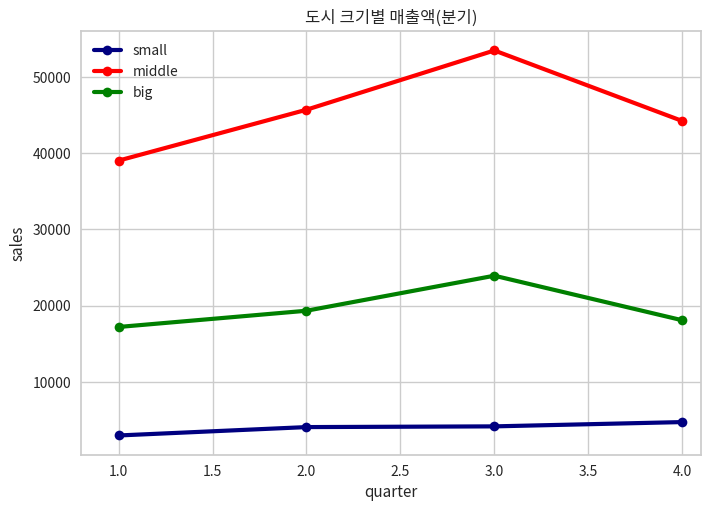

In [302]:
small_sales.plot(label='small',linewidth=3,marker='o',color='navy')
middle_sales.plot(label='middle',linewidth=3,marker='o',color='red')
big_sales.plot(label='big',linewidth=3,marker='o',color='green')

plt.ylabel('sales')
plt.title('도시 크기별 매출액(분기)')
plt.xlim(0.8,4.1)
plt.yticks(rotation=0)
plt.legend()
plt.show()

In [281]:
small_sales=small.groupby('quarter')['invoice'].nunique()
middle_sales=middle.groupby('quarter')['invoice'].nunique()
big_sales=big.groupby('quarter')['invoice'].nunique()

In [282]:
small_sales

quarter
1    141
2    210
3    210
4    175
Name: invoice, dtype: int64

In [304]:
small_sales=small.groupby('quarter')['customer_id'].nunique()
middle_sales=middle.groupby('quarter')['customer_id'].nunique()
big_sales=big.groupby('quarter')['customer_id'].nunique()

In [305]:
small_sales

quarter
1     84
2    101
3    113
4     76
Name: customer_id, dtype: int64

In [285]:
small_sales=small.groupby('quarter')['customer_id'].count()
middle_sales=middle.groupby('quarter')['customer_id'].count()
big_sales=big.groupby('quarter')['customer_id'].count()

In [286]:
small_sales

quarter
1    2962
2    4062
3    4156
4    4719
Name: customer_id, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

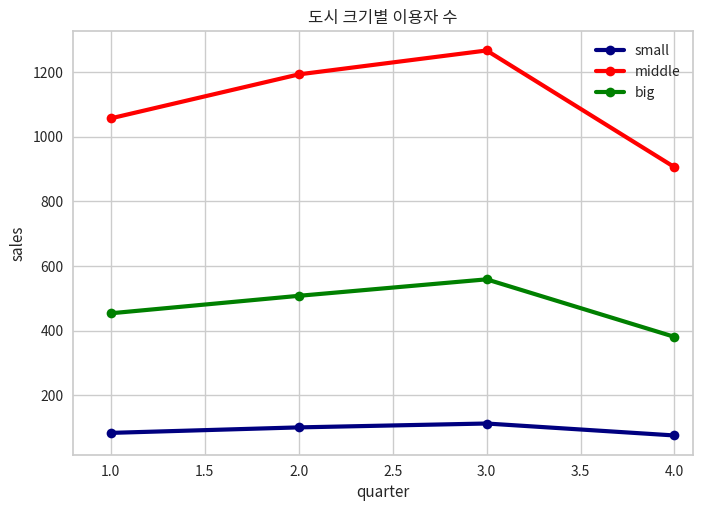

In [307]:
small_sales.plot(label='small',linewidth=3,marker='o',color='navy')
middle_sales.plot(label='middle',linewidth=3,marker='o',color='red')
big_sales.plot(label='big',linewidth=3,marker='o',color='green')
plt.ylabel('sales')
plt.title('도시 크기별 이용자 수')
plt.xlim(0.8,4.1)
plt.yticks(rotation=0)
plt.legend()
plt.show

<AxesSubplot:title={'center':'분기별 이용자 수(customer_id) 변화 추이'}, xlabel='quarter', ylabel='이용자 수'>

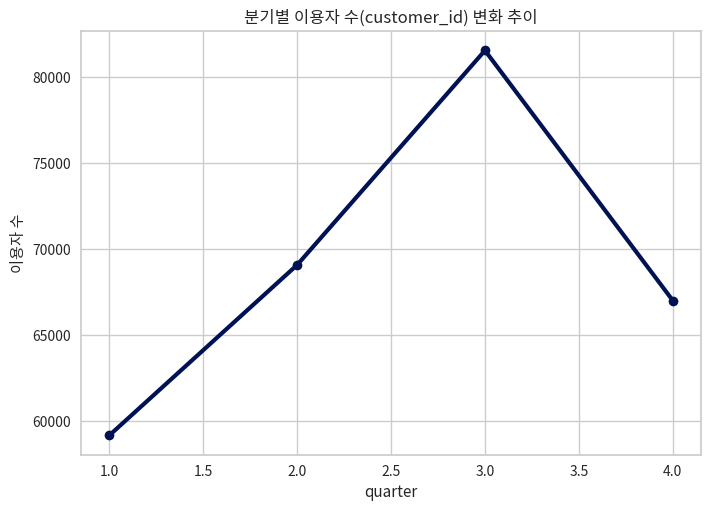

In [311]:
df_custom=df_raw.groupby('quarter')['customer_id'].count()
plt.title('분기별 이용자 수(customer_id) 변화 추이')
plt.ylabel('이용자 수')
df_custom.plot(c='#001254',linewidth=3,marker='o')